# Exercise 2.9


In [6]:
# Data
xsis = c(.005, 0)
sigmas = c(.05, 1)
ns = c(100, 10000, 1000000)

[1]  0,04014412 -0,16293661  0,05886051  0,03026077
[1] 110,936392   9,174066 126,340316  91,784617


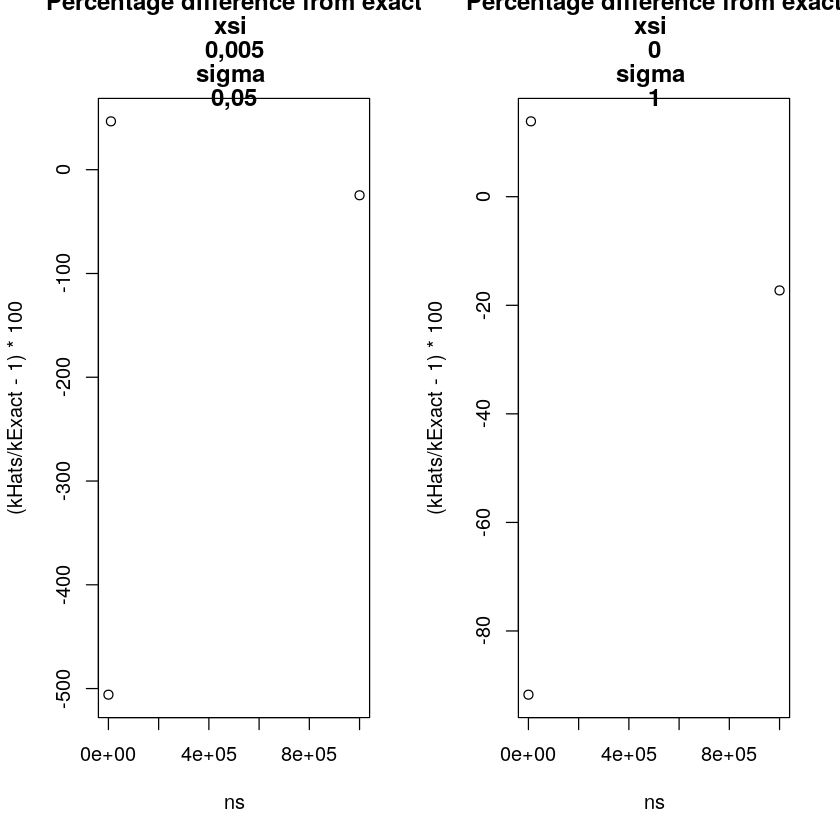

In [39]:
# Simlations
kHats = numeric(length(ns))

par(mfrow = c(1,2));
for( j in 1:length(xsis)){
    sigma = sigmas[j]
    xsi = xsis[j]
    kExact = exp(4*sigma**2) + 2*exp(3*sigma**2) + 3*exp(2*sigma**2) - 6    

    i = 1
    for( n in ns){
        X = rlnorm(n, xsi, sigma)
        Xmean = mean(X)
        kHats[i] = mean((X-Xmean)**4)/var(X)**2 - 3
        i = i + 1
    }
    
    plot(ns, (kHats/kExact - 1)*100)
    #plot(ns, kHats)
    #abline(h = kExact, lty=2, lwd=2, col="red")
    title(c("Percentage difference from exact", "xsi ", xsi, 'sigma ', sigma))    
    print(c(kExact, kHats))
}



Both models get closer with larger number of simulations.
<br>
Less difference when larger variation and smaller mean.

# Exercise 2.10

__$m$ Cauchy distributed variables and their average. Sampling this distribution with inverse function.__

We have calculated the inverse CFD, which gives X for different prbabilities, $u$. 
<br>
1) Make u: $U\sim U(0,1)$<br>
2) Insert the U's into $F^{-1}(U)$ to get the X'es. <br>
3) Calculate $\overline{X}$

In [9]:
arrayNumberOfSimulations = c(1e2, 1e3, 1e4, 1e6) 
beta = 1

for (numberOfSimulations in arrayNumberOfSimulations){
    U = runif(numberOfSimulations)
    X = beta*tan((U - .5)*pi)
    Xmean = mean(X)
    print(c('Simulations: ', numberOfSimulations, 'Mean:', Xmean))
}

[1] "Simulations: "    "100"              "Mean:"            "1.81939839994345"
[1] "Simulations: "      "1000"               "Mean:"             
[4] "-0.424077143758311"
[1] "Simulations: "     "10000"             "Mean:"            
[4] "-3.76034939496747"
[1] "Simulations: "     "1e+06"             "Mean:"            
[4] "0.454726007937755"


### Exercise 2.12
### Truncated distribution. Sample distribution with minimum value

In [19]:
simulations <- 1e4
xsi = 0
sigma = 1
as = c(1, 2, 3)

for( a in as){
    p = 1 - pnorm(a, xsi, sigma) # p = 1 - F(a)    
    X = qnorm(1 - p + p*runif(simulations), xsi, sigma)
    Xmean = mean(X)
    Xsd = sd(X)
    print(c('Mean: ', Xmean, 'Std ', Xsd))
}


[1] "Mean: "            "1,52507119278542"  "Std "             
[4] "0,437885391247674"
[1] "Mean: "            "2,36894486430897"  "Std "             
[4] "0,335937926886236"
[1] "Mean: "            "3,28908397874214"  "Std "             
[4] "0,266773975105257"


Mean increases with $a$, which suggests that it is not the usual normal distribution sampling.<br>

Std goes down with $a$. Fewer values to choose from?